In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
# Get the shape of the arrays
print('x_train shape:', x_train.shape)
print('y_test shape:', y_train.shape)
print('x_train shape:', x_test.shape)
print('y_test shape:', x_test.shape)

x_train shape: (50000, 32, 32, 3)
y_test shape: (50000, 1)
x_train shape: (10000, 32, 32, 3)
y_test shape: (10000, 32, 32, 3)


In [5]:
# Take a look at the first image as an array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

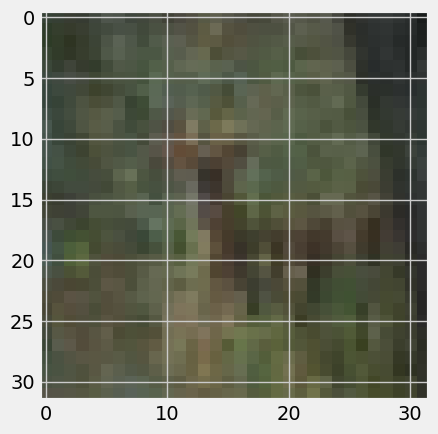

In [6]:
# Show the image as a picture
img = plt.imshow(x_train[index])

In [7]:
# Get the image label
print('Teh image label is:', y_train[index])

Teh image label is: [4]


In [8]:
# Get the image classification
classification = ['airplane', 'autombile', 'bird',  'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Pring the image class
print('Thee image class is ', classification[y_train[index][0]])

Thee image class is  deer


In [9]:
# Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
# Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
# Print the new label of the image/picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [12]:
# Normalize the pixels to be values between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [14]:
# Create the models architecture
model = Sequential()

# Add the first layer
model.add(Conv2D(32, (5, 5), activation = 'relu', input_shape = (32, 32, 3)) )

# Add a pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add another convolution layer
model.add(Conv2D(32, (5, 5), activation = 'relu') )

# Add another pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add a flattening layer
model.add(Flatten())

# Add a  layer with 1000 neurous
model.add(Dense(1000, activation='relu'))

# Add a drop out layer
model.add(Dropout(0.5))

# Add a  layer with 500 neurous
model.add(Dense(500, activation='relu'))

# Add a drop out layer
model.add(Dropout(0.5))

# Add a  layer with 250 neurous
model.add(Dense(250, activation='relu'))

# Add a  layer with 10 neurous
model.add(Dense(10, activation='softmax'))

c:\Users\Magician\Desktop\imageProject\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the  model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =  ['accuracy'])

In [16]:
# Train the model
hist  = model.fit(x_train, y_train_one_hot, batch_size = 256, epochs = 10, validation_split = 0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - accuracy: 0.2493 - loss: 1.9938 - val_accuracy: 0.4534 - val_loss: 1.4825
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.4752 - loss: 1.4372 - val_accuracy: 0.5378 - val_loss: 1.2872
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.5486 - loss: 1.2602 - val_accuracy: 0.5908 - val_loss: 1.1641
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.6008 - loss: 1.1344 - val_accuracy: 0.5976 - val_loss: 1.1322
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.6282 - loss: 1.0493 - val_accuracy: 0.6117 - val_loss: 1.1211
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.6525 - loss: 0.9800 - val_accuracy: 0.6644 - val_loss: 0.9544
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.6793 - loss: 0.9052 - val_accuracy: 0.6587 - val_loss: 0.9706
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.6989 - loss: 0.8531 -

In [17]:
# Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6882 - loss: 0.8848


0.6927000284194946

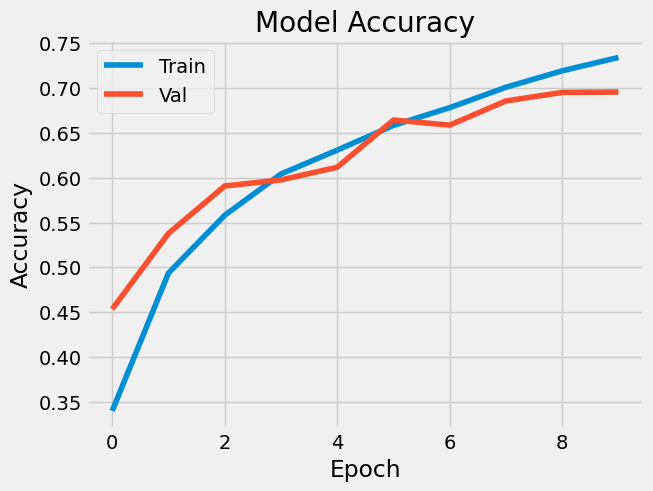

In [18]:
# Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

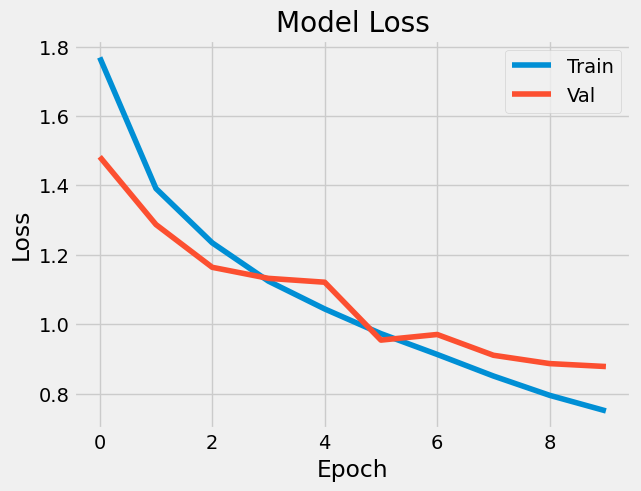

In [19]:
# Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

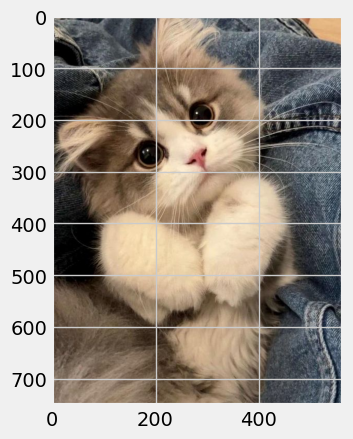

In [20]:
# show the image
new_image = plt.imread('./source/cuteCat.jpg')
img = plt.imshow(new_image)

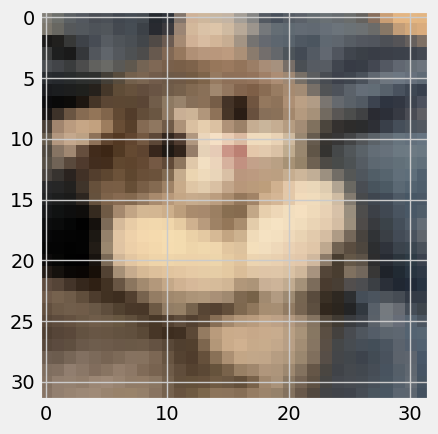

In [21]:
# Resize th image
from skimage.transform import resize
resized_image = resize(new_image, (32, 32, 3))
img = plt.imshow(resized_image)

In [22]:
# Get the models predictions
predictions = model.predict(np.array([resized_image]))

# Show the predictions
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


array([[1.8321112e-05, 7.9143545e-05, 8.4745018e-03, 3.4927401e-01,
        2.6708711e-03, 5.0617105e-01, 1.3236575e-01, 8.4246055e-04,
        6.0318660e-05, 4.3584008e-05]], dtype=float32)

In [23]:
# Sort the predictions from least to greatest
list_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x = predictions
for i in range(10):
    for j in  range (10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

# Show the sorted labels in  order
print(list_index)

[5, 3, 6, 2, 4, 7, 1, 8, 9, 0]


In [24]:
# Print the first 5 predictions(set width with max length of the label)
maxLen = 0
for i in range(5):
    if (len(classification[list_index[i]]) > maxLen):
        maxLen = len(classification[list_index[i]])

for i in range (5):
    print(f"{classification[list_index[i]]:{maxLen}} : {round(predictions[0][list_index[i]] * 100, 2)} %")

dog  : 50.62 %
cat  : 34.93 %
frog : 13.24 %
bird : 0.85 %
deer : 0.27 %
